### Workshop - Decision Trees
This workshop deals with understanding the working of decision trees.

### Author: Madhushree M

Copyright Madhushree M 2021

In [21]:
# Importing libraries
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
# importing data frame
df = pd.read_csv('Iris.csv')
df.head()

<IPython.core.display.Javascript object>

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# shape of the data
df.shape

(150, 6)

* There are 150 examples and 6 attributes

In [5]:
# 5 point summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


* There are no null values.
* The mean and median resembles the data distribution is symmetric.

<IPython.core.display.Javascript object>

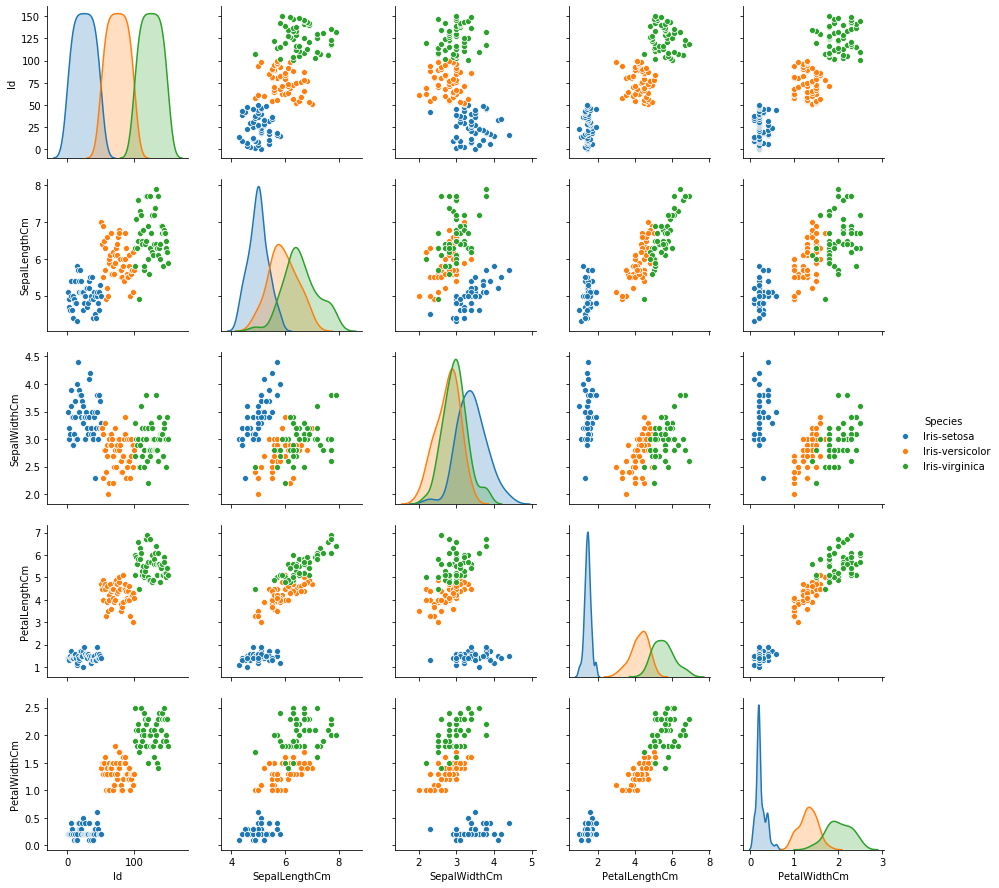

In [9]:
# analysing the pair panels
sns.pairplot(df,hue='Species',diag_kind='kde')

* There are three  gaussians in the panels
* We can clearly notice the separation of classes.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

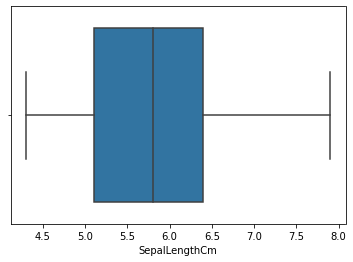

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

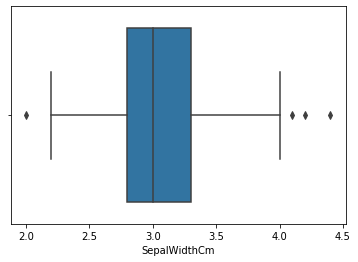

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

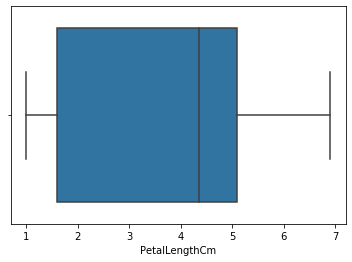

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

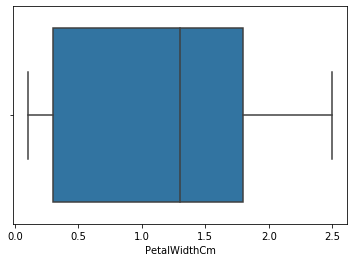

In [10]:
for i in df.drop(['Id','Species'],1).columns:
    sns.boxplot(df[i])
    plt.show()

* There are minimal amount of outliers observed in Sepalwidth.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

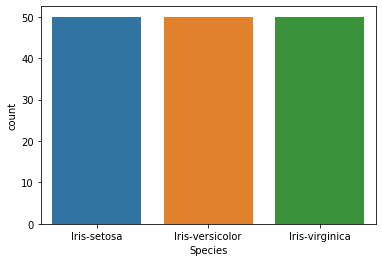

In [11]:
# Target proportion
sns.countplot(df['Species'])
plt.show()

* We can notice that target classes were equally distributed.

#### Data Preparation

In [16]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
print('Target proportions : ',Counter(df['Species']))

<IPython.core.display.Javascript object>

Target proportions :  Counter({0: 50, 1: 50, 2: 50})


In [17]:
x = df.drop('Species',1)
y = df.Species

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2021)

print('X Train shape : ',x_train.shape)
print('X Test shape : ',x_test.shape)
print('Y Train shape : ',y_train.shape)
print('Y Test shape : ',y_test.shape)

<IPython.core.display.Javascript object>

X Train shape :  (105, 5)
X Test shape :  (45, 5)
Y Train shape :  (105,)
Y Test shape :  (45,)


#### Decision Tree

In [28]:
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)

ypredict_train = model.predict(x_train)
ypredict_test = model.predict(x_test)

print('The classification report of Train Data')
print(classification_report(y_train,ypredict_train))
print('The classification report of Test Data')
print(classification_report(y_test,ypredict_test))

The classification report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

The classification report of Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



* Our model has done exceptionally well,but how trusted it is?
* As our model is 100% accurate it might tend to overfit,let's regularize it and see

#### Regularizing Decision tree

In [22]:
params={'criterion':['gini','entropy'],
                'max_depth':[2,3,4,5,6,7,8,9,10]}

dt = DecisionTreeClassifier()

gv= GridSearchCV(dt,param_grid=params,cv=5,scoring='f1_weighted')
model_gv=gv.fit(x_train,y_train)
model_gv.best_params_

{'criterion': 'gini', 'max_depth': 2}

#### model with tuned parameters

In [23]:
dt_tuned = DecisionTreeClassifier(criterion='gini',max_depth=2)
model_tuned = dt_tuned.fit(x_train,y_train)

ypredict_train_tuned = model_tuned.predict(x_train)
ypredict_test_tuned = model_tuned.predict(x_test)

print('The classification report of Train Data')
print(classification_report(y_train,ypredict_train_tuned))
print('The classification report of Test Data')
print(classification_report(y_test,ypredict_test_tuned))

The classification report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

The classification report of Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**The results with tuned paarameters remian same, that says the model can generalize well**

#### Tree Visualisation

In [24]:
from sklearn import tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

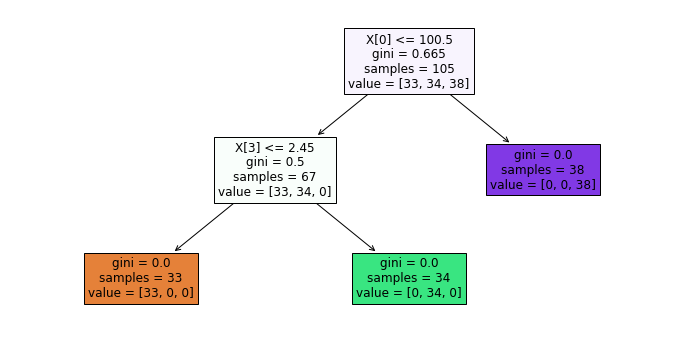

In [34]:
plt.figure(figsize=(12,6))
tree.plot_tree(dt,filled=True,fontsize=12)
plt.show()

**The node splitting and the impurity level at each node can be clearly shown**